In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import seaborn as sb
from plotter import *

In [2]:
path = 'simulations/uiuc/data_files/UIUC_CC30_52.sqlite'
path = 'simulations/uiuc/data_files/UIUC_MGA_52.sqlite'
conn = sqlite3.connect(path)

In [3]:
cursor = conn.cursor()
command = """SELECT DISTINCT scenario FROM Output_VFlow_Out"""
tab = cursor.execute(command)
scenarios = [s[0] for s in cursor.fetchall()]
scenarios

['MGA',
 'MGA_mga_0',
 'MGA_mga_1',
 'MGA_mga_2',
 'MGA_mga_3',
 'MGA_mga_4',
 'MGA_mga_5']

In [4]:
place = "UIUC"
carrier = 'ELC'
frames = []
for s in scenarios[1:]:
    df = get_annual_capacity(conn, place, carrier, scenario=s)
    N = len(df)
    df['SID'] = [s for i in range(N)]
    frames.append(df)

elc_df = pd.concat(frames)
elc_df

,ABBOTT_TB,IMP_ELC,LI_BATTERY,NUCLEAR_TB,SOLAR_FARM,WIND_FARM,SID
year,,,,,,,
2025,0.000000,58.083733,0.000000,0.000000,342.82539,22.603691,MGA_mga_0
2030,0.000000,60.115806,0.000066,0.000000,342.82539,97.541137,MGA_mga_0
2035,0.000000,62.695411,0.000205,0.000000,342.82539,97.541137,MGA_mga_0
2040,0.000000,72.619433,0.000252,0.000000,338.93739,99.405194,MGA_mga_0
2045,0.000000,84.127316,0.000142,0.000000,429.91210,100.500000,MGA_mga_0
2050,0.000000,129.282060,0.000112,0.000000,287.84050,99.082308,MGA_mga_0
2025,0.000000,60.000000,0.000000,0.000000,16.96000,86.555204,MGA_mga_1
2030,0.000000,60.705185,0.000000,0.000000,466.04392,86.555204,MGA_mga_1
2035,0.000000,66.366160,0.000000,0.000000,466.04392,100.500000,MGA_mga_1


In [5]:
cap_tech_df = elc_df.drop(columns='SID')

<AxesSubplot:>

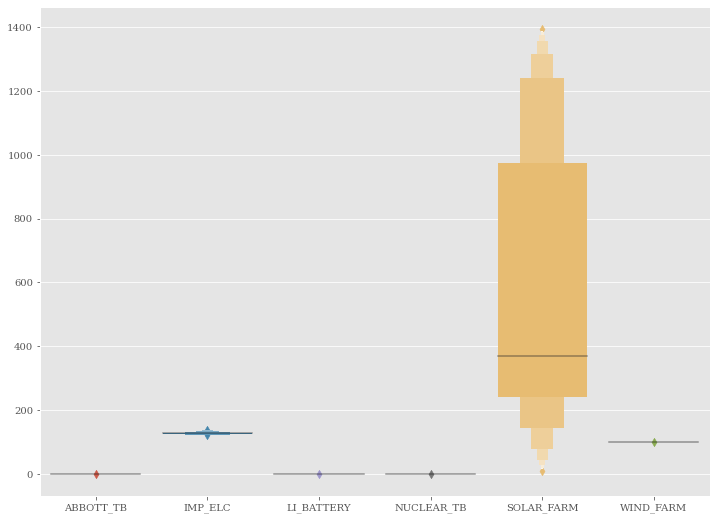

In [6]:
sb.boxenplot(data=cap_tech_df[cap_tech_df.index == 2050])

In [7]:
place = "UIUC"
carrier = ['STM', 'NUC_STM']
frames = []
for s in scenarios[1:]:
    df = get_annual_capacity(conn, place, carrier, scenario=s)
    N = len(df)
    df['SID'] = [s for i in range(N)]
    frames.append(df)

stm_df = pd.concat(frames)
stm_df.replace(12703.504000, np.nan, inplace=True)
stm_df

,ABBOTT,NUCLEAR_THM,SID
year,,,
2025,261.030000,20.081282,MGA_mga_0
2030,261.030000,33.561641,MGA_mga_0
2035,261.030000,42.905253,MGA_mga_0
2040,156.618000,50.274091,MGA_mga_0
2045,39.459075,85.518047,MGA_mga_0
2050,39.459075,119.516910,MGA_mga_0
2025,261.030000,22.670558,MGA_mga_1
2030,261.030000,32.547390,MGA_mga_1
2035,261.030000,45.814658,MGA_mga_1


In [8]:
full_df = pd.concat([elc_df, stm_df], axis=1).drop_duplicates()
full_df

,ABBOTT_TB,IMP_ELC,LI_BATTERY,NUCLEAR_TB,SOLAR_FARM,WIND_FARM,SID,ABBOTT,NUCLEAR_THM,SID
year,,,,,,,,,,
2025,0.000000,58.083733,0.000000,0.000000,342.82539,22.603691,MGA_mga_0,261.030000,20.081282,MGA_mga_0
2030,0.000000,60.115806,0.000066,0.000000,342.82539,97.541137,MGA_mga_0,261.030000,33.561641,MGA_mga_0
2035,0.000000,62.695411,0.000205,0.000000,342.82539,97.541137,MGA_mga_0,261.030000,42.905253,MGA_mga_0
2040,0.000000,72.619433,0.000252,0.000000,338.93739,99.405194,MGA_mga_0,156.618000,50.274091,MGA_mga_0
2045,0.000000,84.127316,0.000142,0.000000,429.91210,100.500000,MGA_mga_0,39.459075,85.518047,MGA_mga_0
2050,0.000000,129.282060,0.000112,0.000000,287.84050,99.082308,MGA_mga_0,39.459075,119.516910,MGA_mga_0
2025,0.000000,60.000000,0.000000,0.000000,16.96000,86.555204,MGA_mga_1,261.030000,22.670558,MGA_mga_1
2030,0.000000,60.705185,0.000000,0.000000,466.04392,86.555204,MGA_mga_1,261.030000,32.547390,MGA_mga_1
2035,0.000000,66.366160,0.000000,0.000000,466.04392,100.500000,MGA_mga_1,261.030000,45.814658,MGA_mga_1


full_df.replace(12703.504000, np.nan, inplace=True)

In [9]:
full_cap_df = full_df.drop(columns='SID')

<AxesSubplot:>

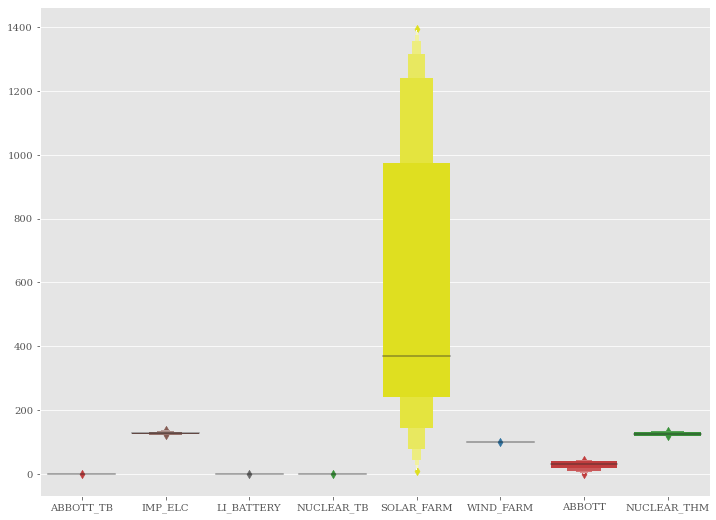

In [10]:
sb.boxenplot(data=full_cap_df[full_cap_df.index == 2050], palette=elc_colors)

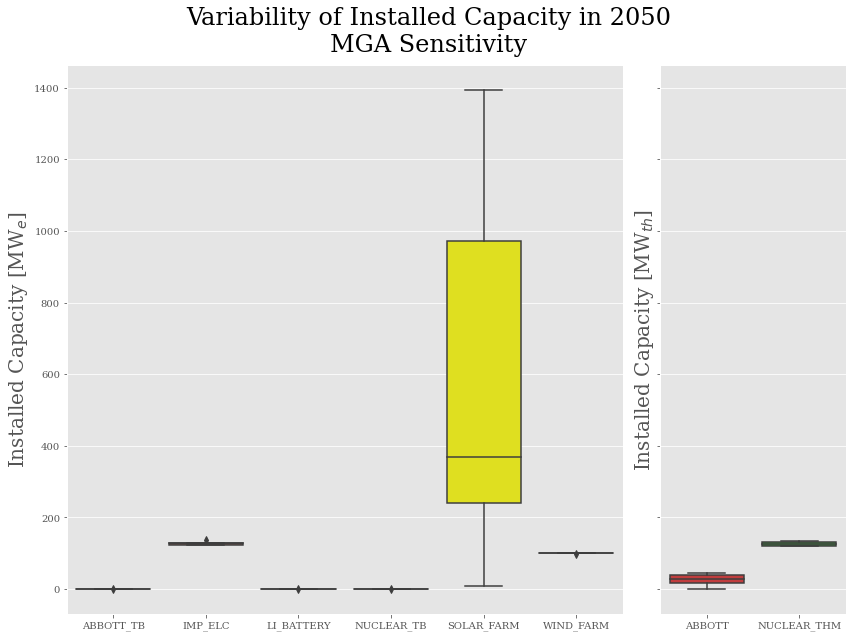

In [11]:
fig, axes = plt.subplots(1,2, sharey=True, gridspec_kw={'width_ratios': [3, 1]})
sb.boxplot(ax=axes[1], data=stm_df.drop(columns="SID").loc[2050], palette=elc_colors)
sb.boxplot(ax=axes[0], data=elc_df.drop(columns="SID").loc[2050], palette=elc_colors)
axes[0].set_ylabel('Installed Capacity [MW$_e$]', fontsize=20)
axes[1].set_ylabel('Installed Capacity [MW$_{th}$]', fontsize=20)
plt.suptitle('Variability of Installed Capacity in 2050\nMGA Sensitivity', fontsize=24)
plt.tight_layout()

In [12]:
place = "UIUC"
carrier = 'CHW'
frames = []
for s in scenarios[1:]:
    df = get_annual_capacity(conn, place, carrier, scenario=s)
    N = len(df)
    df['SID'] = [s for i in range(N)]
    frames.append(df)

cw_df = pd.concat(frames)
cw_df.replace(12703.504000, np.nan, inplace=True)
cw_df

,CWS,CW_STORAGE,SID
year,,,
2025,35681.725,-3.767185e-09,MGA_mga_0
2030,59593.060,-3.767185e-09,MGA_mga_0
2035,66100.731,2.854677e-09,MGA_mga_0
2040,66100.731,6.657250e-09,MGA_mga_0
2045,66100.731,6.657250e-09,MGA_mga_0
2050,66100.731,3.045449e-07,MGA_mga_0
2025,35681.725,0.000000e+00,MGA_mga_1
2030,55927.397,0.000000e+00,MGA_mga_1
2035,62351.520,0.000000e+00,MGA_mga_1


<AxesSubplot:>

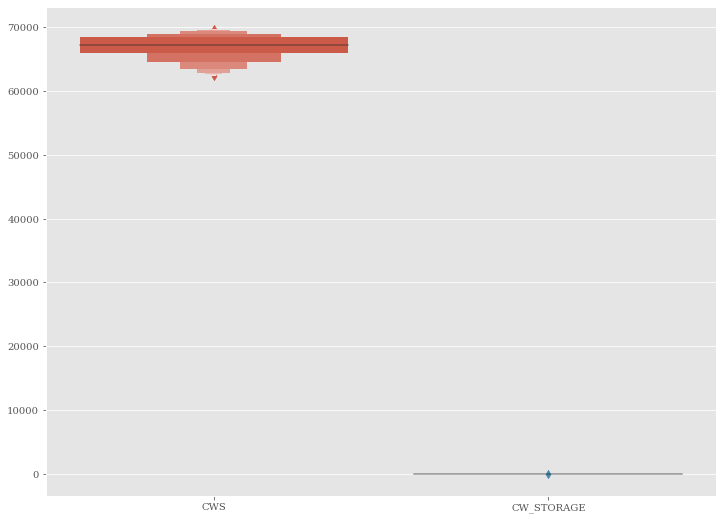

In [13]:
sb.boxenplot(data=cw_df.drop(columns='SID').loc[2050])

<AxesSubplot:xlabel='year'>

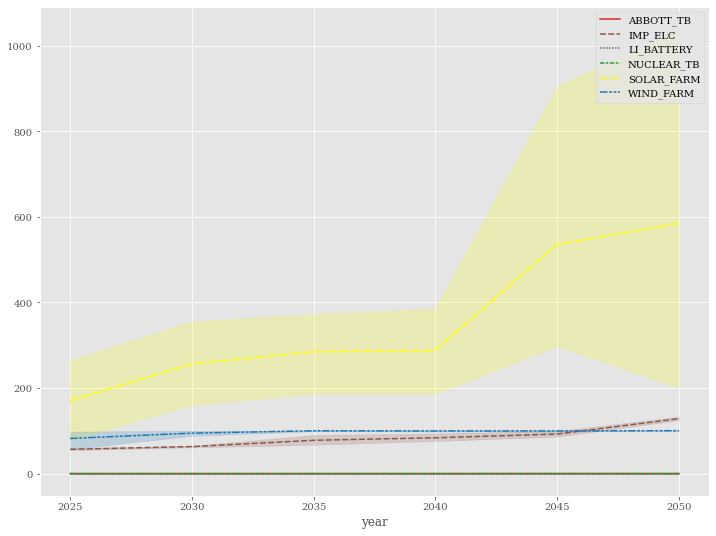

In [14]:
sb.lineplot(data=elc_df.drop(columns='SID'), palette=elc_colors)

In [15]:
v = list(elc_df.columns)
i = list(range(len(v)))
d = dict(zip(v,i))

sb.lineplot(x=elc_df['SID'],y=elc_df.iloc[d['SOLAR_FARM']], palette=elc_colors)

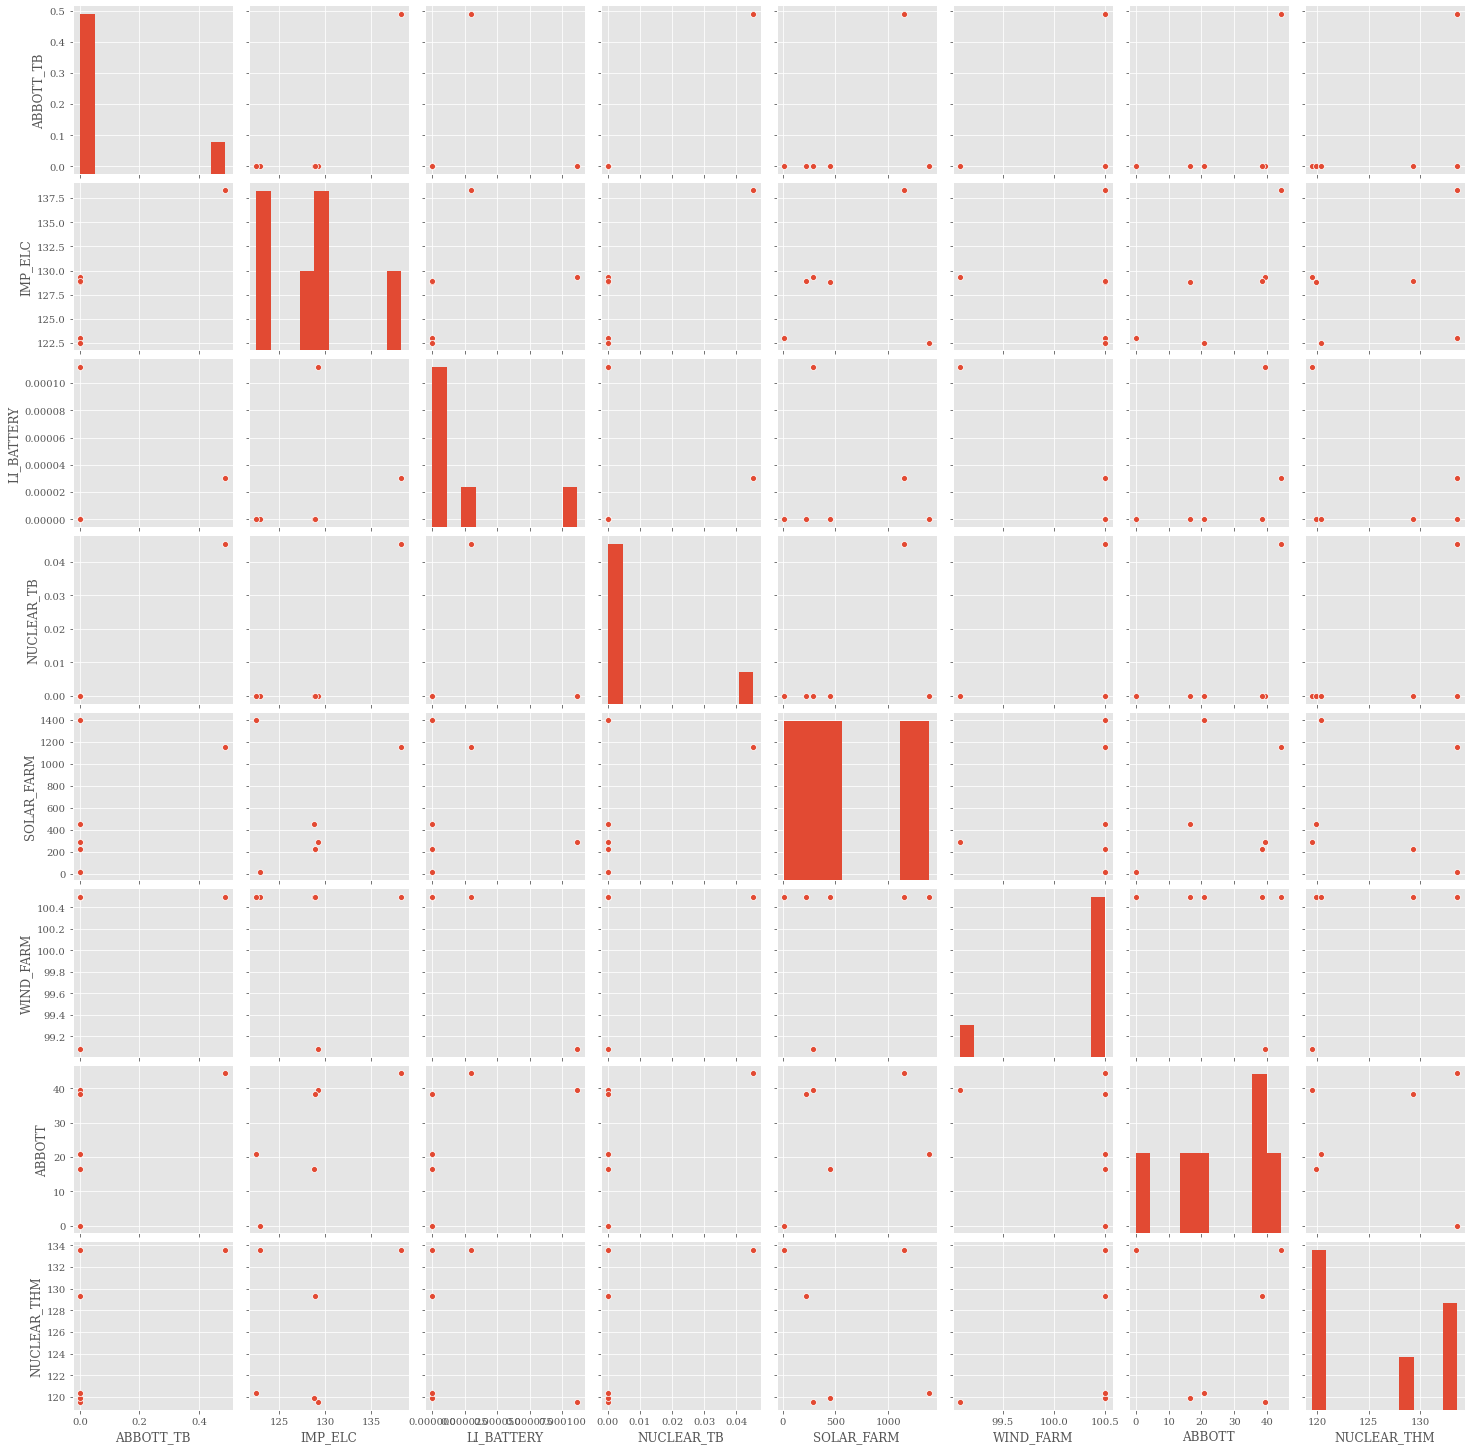

In [17]:
sb.pairplot(full_df.drop(columns='SID').groupby(elc_df.index).get_group(2050))